In [1]:
import geopandas as gpd

In [2]:
countries = gpd.read_file("data/countries/archive/countries.geojson")
countries.head()

In [4]:
import geojsonio

In [6]:
stats[stats.ISO_A3 == "USA"]

,ADMIN,ISO_A3,geometry
238,United States of America,USA,(POLYGON ((-155.6065189699999 20.1379555660001...


In [17]:
import pickle
with open("people_frame.pickle","rb") as fin:
    people = pickle.load(fin)

In [18]:
people.head()

,birth,birthCoords,death,deathCoords,image,person,personDescription,personLabel,placeOfBirth,placeOfBirthLabel,placeOfDeath,placeOfDeathLabel
0,0385-01-01T00:00:00Z,Point(-0.57 52.22),0461-03-18T00:00:00Z,Point(-5.67452 54.3439),http://commons.wikimedia.org/wiki/Special:File...,http://www.wikidata.org/entity/Q165479,5th-century Romano-British Christian missionar...,Saint Patrick,http://www.wikidata.org/entity/Q185103,Roman Britain,http://www.wikidata.org/entity/Q3259836,Saul
12,1081-12-07T00:00:00Z,Point(2.351827777 48.856577777),1137-08-08T00:00:00Z,Point(2.8072 49.302009),http://commons.wikimedia.org/wiki/Special:File...,http://www.wikidata.org/entity/Q165883,King of France,Louis VI of France,http://www.wikidata.org/entity/Q90,Paris,http://www.wikidata.org/entity/Q48622322,Château de la Douye
24,0560-01-01T00:00:00Z,Point(-0.981944444 37.6),0636-04-07T00:00:00Z,Point(-5.983333333 37.383333333),http://commons.wikimedia.org/wiki/Special:File...,http://www.wikidata.org/entity/Q166876,"bishop, confessor and doctor of the Catholic C...",Isidore of Seville,http://www.wikidata.org/entity/Q162615,Cartagena,http://www.wikidata.org/entity/Q8717,Seville
36,0790-01-01T00:00:00Z,Point(12.482777777 41.893055555),0844-01-29T00:00:00Z,Point(12.482777777 41.893055555),http://commons.wikimedia.org/wiki/Special:File...,http://www.wikidata.org/entity/Q167052,Pope from 827 until 844,Gregory IV,http://www.wikidata.org/entity/Q220,Rome,http://www.wikidata.org/entity/Q220,Rome
48,0390-01-01T00:00:00Z,Point(12.482777777 41.893055555),0440-08-20T00:00:00Z,Point(12.482777777 41.893055555),http://commons.wikimedia.org/wiki/Special:File...,http://www.wikidata.org/entity/Q167065,pope,Sixtus III,http://www.wikidata.org/entity/Q220,Rome,http://www.wikidata.org/entity/Q220,Rome


In [23]:
people_cleaned = people.loc[people.birthCoords.apply(lambda x: x.startswith("Point"))]

In [19]:
import shapely.wkt


In [24]:
people_cleaned.head()

,birth,birthCoords,death,deathCoords,image,person,personDescription,personLabel,placeOfBirth,placeOfBirthLabel,placeOfDeath,placeOfDeathLabel
0,0385-01-01T00:00:00Z,Point(-0.57 52.22),0461-03-18T00:00:00Z,Point(-5.67452 54.3439),http://commons.wikimedia.org/wiki/Special:File...,http://www.wikidata.org/entity/Q165479,5th-century Romano-British Christian missionar...,Saint Patrick,http://www.wikidata.org/entity/Q185103,Roman Britain,http://www.wikidata.org/entity/Q3259836,Saul
12,1081-12-07T00:00:00Z,Point(2.351827777 48.856577777),1137-08-08T00:00:00Z,Point(2.8072 49.302009),http://commons.wikimedia.org/wiki/Special:File...,http://www.wikidata.org/entity/Q165883,King of France,Louis VI of France,http://www.wikidata.org/entity/Q90,Paris,http://www.wikidata.org/entity/Q48622322,Château de la Douye
24,0560-01-01T00:00:00Z,Point(-0.981944444 37.6),0636-04-07T00:00:00Z,Point(-5.983333333 37.383333333),http://commons.wikimedia.org/wiki/Special:File...,http://www.wikidata.org/entity/Q166876,"bishop, confessor and doctor of the Catholic C...",Isidore of Seville,http://www.wikidata.org/entity/Q162615,Cartagena,http://www.wikidata.org/entity/Q8717,Seville
36,0790-01-01T00:00:00Z,Point(12.482777777 41.893055555),0844-01-29T00:00:00Z,Point(12.482777777 41.893055555),http://commons.wikimedia.org/wiki/Special:File...,http://www.wikidata.org/entity/Q167052,Pope from 827 until 844,Gregory IV,http://www.wikidata.org/entity/Q220,Rome,http://www.wikidata.org/entity/Q220,Rome
48,0390-01-01T00:00:00Z,Point(12.482777777 41.893055555),0440-08-20T00:00:00Z,Point(12.482777777 41.893055555),http://commons.wikimedia.org/wiki/Special:File...,http://www.wikidata.org/entity/Q167065,pope,Sixtus III,http://www.wikidata.org/entity/Q220,Rome,http://www.wikidata.org/entity/Q220,Rome


In [26]:
x = people_cleaned.head()


In [53]:
locs = people_cleaned[ ["birthCoords", "person"] ].copy()
locs["birthCoords"] = locs["birthCoords"].apply(shapely.wkt.loads)
locs = gpd.GeoDataFrame(locs, geometry="birthCoords", crs={'init':'epsg:4326'})
locs = gpd.sjoin(locs, countries, how="inner", op="intersects")

In [54]:
locs.head()

,birthCoords,person,index_right,ADMIN,ISO_A3
0,POINT (-0.57 52.22),http://www.wikidata.org/entity/Q165479,81,United Kingdom,GBR
204,POINT (-2 51.2),http://www.wikidata.org/entity/Q170017,81,United Kingdom,GBR
1464,POINT (-3.25 57.416666666),http://www.wikidata.org/entity/Q117633,81,United Kingdom,GBR
1476,POINT (-1 53),http://www.wikidata.org/entity/Q117647,81,United Kingdom,GBR
1560,POINT (-5 57),http://www.wikidata.org/entity/Q122479,81,United Kingdom,GBR


In [67]:
country_counts = locs.groupby("ISO_A3").size().reset_index(name="counts")
country_counts.head()

,ISO_A3,counts
0,-99,94
1,ABW,1
2,AFG,159
3,AGO,11
4,ALA,9


In [68]:
x = countries.merge(country_counts, on = "ISO_A3")
x.head()

,ADMIN,ISO_A3,geometry,counts
0,Aruba,ABW,POLYGON ((-69.99693762899992 12.57758209800004...,1
1,Afghanistan,AFG,"POLYGON ((71.04980228700009 38.40866445000009,...",159
2,Angola,AGO,(POLYGON ((11.73751945100014 -16.6925779829998...,11
3,Albania,ALB,"POLYGON ((19.74776574700007 42.57890085900007,...",110
4,Aland,ALA,(POLYGON ((20.92017662900008 59.90924713700012...,9


In [82]:
x["capped"] = x.counts.clip(0,5000)

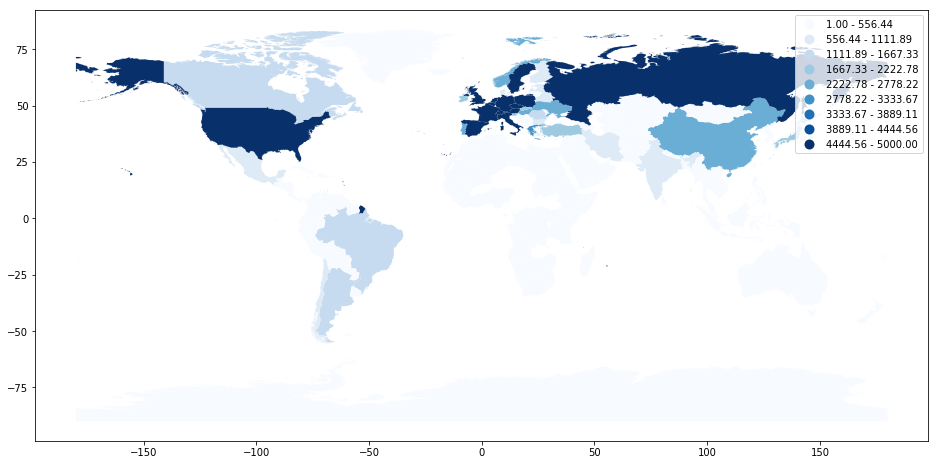

In [83]:
ax = x.dropna().plot(column="capped", cmap="Blues", figsize=(16,10), scheme='equalinterval', k=9, legend=True)

In [38]:
gpd.sjoin(geo_x,countries, how="inner",op="intersects")

,birth,birthCoords,death,deathCoords,image,person,personDescription,personLabel,placeOfBirth,placeOfBirthLabel,placeOfDeath,placeOfDeathLabel,geometry,index_right,ADMIN,ISO_A3
0,0385-01-01T00:00:00Z,Point(-0.57 52.22),0461-03-18T00:00:00Z,Point(-5.67452 54.3439),http://commons.wikimedia.org/wiki/Special:File...,http://www.wikidata.org/entity/Q165479,5th-century Romano-British Christian missionar...,Saint Patrick,http://www.wikidata.org/entity/Q185103,Roman Britain,http://www.wikidata.org/entity/Q3259836,Saul,POINT (-0.57 52.22),81,United Kingdom,GBR
12,1081-12-07T00:00:00Z,Point(2.351827777 48.856577777),1137-08-08T00:00:00Z,Point(2.8072 49.302009),http://commons.wikimedia.org/wiki/Special:File...,http://www.wikidata.org/entity/Q165883,King of France,Louis VI of France,http://www.wikidata.org/entity/Q90,Paris,http://www.wikidata.org/entity/Q48622322,Château de la Douye,POINT (2.351827777 48.856577777),77,France,FRA
24,0560-01-01T00:00:00Z,Point(-0.981944444 37.6),0636-04-07T00:00:00Z,Point(-5.983333333 37.383333333),http://commons.wikimedia.org/wiki/Special:File...,http://www.wikidata.org/entity/Q166876,"bishop, confessor and doctor of the Catholic C...",Isidore of Seville,http://www.wikidata.org/entity/Q162615,Cartagena,http://www.wikidata.org/entity/Q8717,Seville,POINT (-0.981944444 37.6),71,Spain,ESP
36,0790-01-01T00:00:00Z,Point(12.482777777 41.893055555),0844-01-29T00:00:00Z,Point(12.482777777 41.893055555),http://commons.wikimedia.org/wiki/Special:File...,http://www.wikidata.org/entity/Q167052,Pope from 827 until 844,Gregory IV,http://www.wikidata.org/entity/Q220,Rome,http://www.wikidata.org/entity/Q220,Rome,POINT (12.482777777 41.893055555),112,Italy,ITA
48,0390-01-01T00:00:00Z,Point(12.482777777 41.893055555),0440-08-20T00:00:00Z,Point(12.482777777 41.893055555),http://commons.wikimedia.org/wiki/Special:File...,http://www.wikidata.org/entity/Q167065,pope,Sixtus III,http://www.wikidata.org/entity/Q220,Rome,http://www.wikidata.org/entity/Q220,Rome,POINT (12.482777777 41.893055555),112,Italy,ITA
